In [31]:
import os
import matplotlib.pyplot as plt
import tqdm 
import numpy as np

In [4]:
terms = open("medizinische_begriffe_wiki.txt","r")
term_set = set()

for term in terms.read().split(","):
    if term.count(" ") < 3 and len(term) < 20:
        term_set.add(term)
len(term_set)

10265

In [5]:
thresh = 1100 # ca 10kb text

In [67]:
chunk = open("training_data/chunk_short.txt","a", encoding="utf-8")
sentences_per_row = 40

excluded = 0
for filename in tqdm.tqdm(os.listdir("data")):
    with open("data/" + filename, encoding="utf-8") as file:
        text = file.read().replace("\n","")
        split = text.split()
        if len(split) > thresh and term_set.intersection(split):
            sentences = np.array(text.split("."))
            sentence_lengths = np.array(list(map(len,map(str.split, sentences))))
            sentences = sentences[(sentence_lengths > 4) & (sentence_lengths < 30)]
            
            sentences = sentences[:int(len(sentences)/sentences_per_row)*sentences_per_row].reshape(int(len(sentences)/sentences_per_row),sentences_per_row)
            chunk.write("\n".join(map(str.lstrip, map(".".join, sentences))))
        else:
            excluded += 1
chunk.close()

100%|██████████| 99607/99607 [00:31<00:00, 3210.13it/s]


In [ ]:
print(f"Excluded {excluded} files")

In [68]:
import datasets
ds = datasets.load_dataset("text", data_dir="./training_data", split="train")
ds

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 30528
})

In [27]:
excluded = 0
sentence_lengths = []
for filename in tqdm.tqdm(os.listdir("data")):
    with open("data/" + filename, encoding="utf-8") as file:
        text = file.read()
        split = text.split(".")
        sentence_lengths += list(map(len,map(str.split, split)))
        

100%|██████████| 99607/99607 [00:09<00:00, 10953.05it/s]


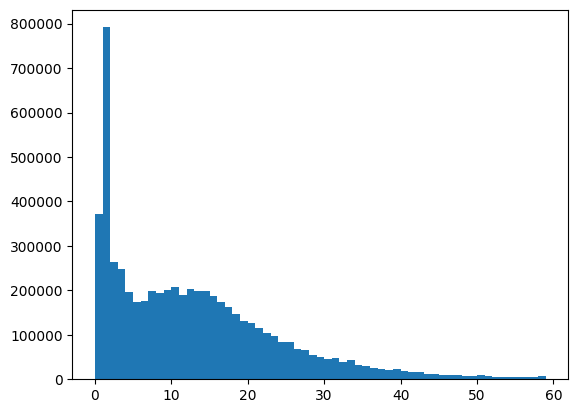

In [29]:
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), 60, 1))
plt.show() 